In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors, metrics

%matplotlib inline

In [3]:
speed_dating = pd.read_csv('~/Desktop/Speed_Dating_Data.csv')
speed_dating.head(20)
speed_dating.shape

(8378, 195)

In [4]:
print(speed_dating.attr.max())
print(speed_dating.attr1_1.max())
print(speed_dating.pf_o_att.max())
print(speed_dating.attr_o.max())
print(speed_dating.attr3_1.max())
print(speed_dating.attr5_1.max())

10.0
100.0
100.0
10.5
10.0
10.0


Print the column names of the dataset to the screen, one column name per line.  

In [5]:
my_list = speed_dating.columns.values
for i in my_list:
    print i

iid
id
gender
idg
condtn
wave
round
position
positin1
order
partner
pid
match
int_corr
samerace
age_o
race_o
pf_o_att
pf_o_sin
pf_o_int
pf_o_fun
pf_o_amb
pf_o_sha
dec_o
attr_o
sinc_o
intel_o
fun_o
amb_o
shar_o
like_o
prob_o
met_o
age
field
field_cd
undergra
mn_sat
tuition
race
imprace
imprelig
from
zipcode
income
goal
date
go_out
career
career_c
sports
tvsports
exercise
dining
museums
art
hiking
gaming
clubbing
reading
tv
theater
movies
concerts
music
shopping
yoga
exphappy
expnum
attr1_1
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
attr4_1
sinc4_1
intel4_1
fun4_1
amb4_1
shar4_1
attr2_1
sinc2_1
intel2_1
fun2_1
amb2_1
shar2_1
attr3_1
sinc3_1
fun3_1
intel3_1
amb3_1
attr5_1
sinc5_1
intel5_1
fun5_1
amb5_1
dec
attr
sinc
intel
fun
amb
shar
like
prob
met
match_es
attr1_s
sinc1_s
intel1_s
fun1_s
amb1_s
shar1_s
attr3_s
sinc3_s
intel3_s
fun3_s
amb3_s
satis_2
length
numdat_2
attr7_2
sinc7_2
intel7_2
fun7_2
amb7_2
shar7_2
attr1_2
sinc1_2
intel1_2
fun1_2
amb1_2
shar1_2
attr4_2
sinc4_2
intel4_2
fun4_2
amb

In [6]:
print len(speed_dating)
print speed_dating.shape[0]

8378
8378


In [7]:
# males 
speed_dating_male = speed_dating[speed_dating.gender == 1]
speed_dating_male.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
100,11,1.0,1,2,1,1,10,7,NaN,4,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
101,11,1.0,1,2,1,1,10,3,NaN,10,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
102,11,1.0,1,2,1,1,10,9,NaN,6,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
103,11,1.0,1,2,1,1,10,6,NaN,3,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
104,11,1.0,1,2,1,1,10,4,NaN,1,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN


In [8]:
# number of males 
len(speed_dating_male)

4194

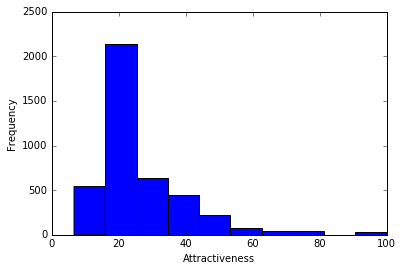

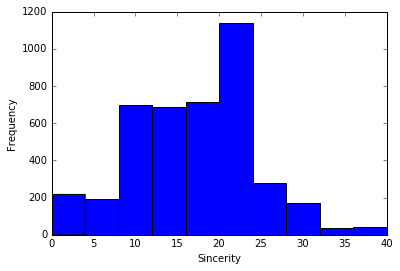

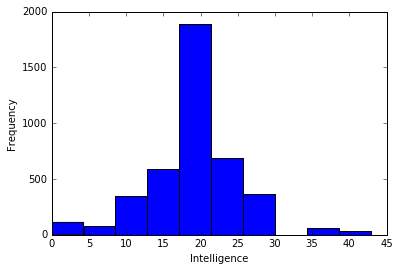

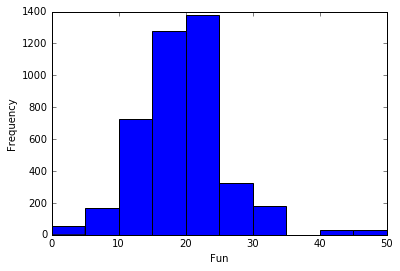

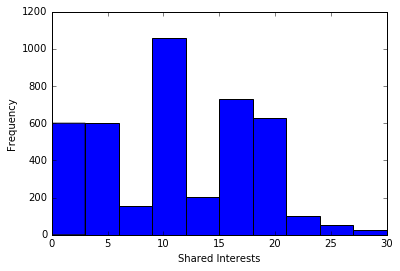

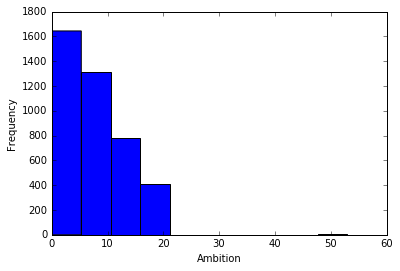

In [53]:
# what males look for in the opposite sex (attractiveness)
plt.hist(speed_dating_male.attr1_1.dropna())
plt.xlabel("Attractiveness")
plt.ylabel("Frequency")
plt.show()

# what males look for in the opposite sex (Sincerity)
plt.hist(speed_dating_male.sinc1_1.dropna())
plt.xlabel("Sincerity")
plt.ylabel("Frequency")
plt.show()

# what males look for in the opposite sex (Intelligence)
plt.hist(speed_dating_male.intel1_1.dropna())
plt.xlabel("Intelligence")
plt.ylabel("Frequency")
plt.show()

# what males look for in the opposite sex (Fun)
plt.hist(speed_dating_male.fun1_1.dropna())
plt.xlabel("Fun")
plt.ylabel("Frequency")
plt.show()

# what males look for in the opposite sex (Shared Interests)
plt.hist(speed_dating_male.shar1_1.dropna())
plt.xlabel("Shared Interests")
plt.ylabel("Frequency")
plt.show()

# what females look for in the opposite sex (Shared Interests)
plt.hist(speed_dating_male.amb1_1.dropna())
plt.xlabel("Ambition")
plt.ylabel("Frequency")
plt.show()

In [10]:
# females 
speed_dating_female = speed_dating[speed_dating.gender == 0]
speed_dating_female.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [11]:
# number of females 
len(speed_dating_female)

4184

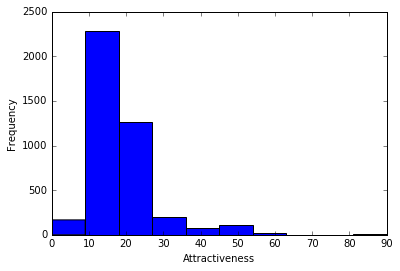

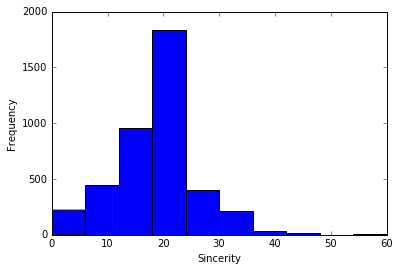

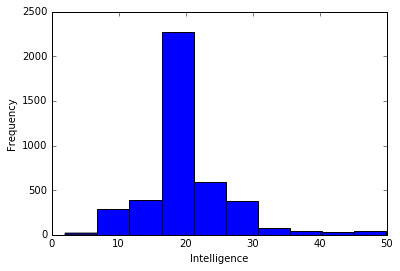

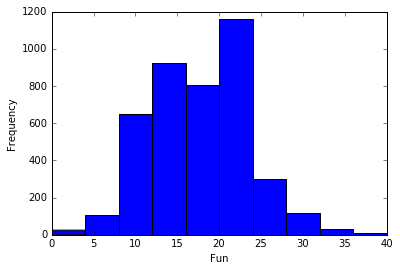

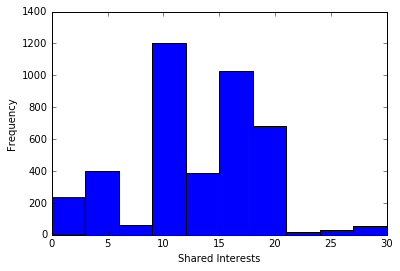

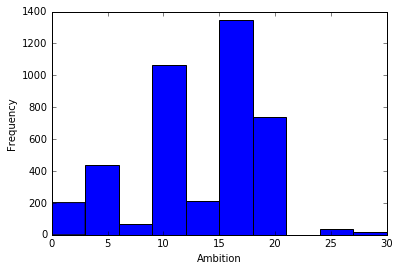

In [52]:
# what females look for in the opposite sex (attractiveness)
plt.hist(speed_dating_female.attr1_1.dropna())
plt.xlabel("Attractiveness")
plt.ylabel("Frequency")
plt.show()

# what females look for in the opposite sex (Sincerity)
plt.hist(speed_dating_female.sinc1_1.dropna())
plt.xlabel("Sincerity")
plt.ylabel("Frequency")
plt.show()

# what females look for in the opposite sex (Intelligence)
plt.hist(speed_dating_female.intel1_1.dropna())
plt.xlabel("Intelligence")
plt.ylabel("Frequency")
plt.show()

# what females look for in the opposite sex (Fun)
plt.hist(speed_dating_female.fun1_1.dropna())
plt.xlabel("Fun")
plt.ylabel("Frequency")
plt.show()

# what females look for in the opposite sex (Shared Interests)
plt.hist(speed_dating_female.shar1_1.dropna())
plt.xlabel("Shared Interests")
plt.ylabel("Frequency")
plt.show()

# what females look for in the opposite sex (Shared Interests)
plt.hist(speed_dating_female.amb1_1.dropna())
plt.xlabel("Ambition")
plt.ylabel("Frequency")
plt.show()

In [24]:
speed_dating.dropna(how = 'any', subset = ['match', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar'], inplace = True)
X = speed_dating[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]
y = speed_dating['match']

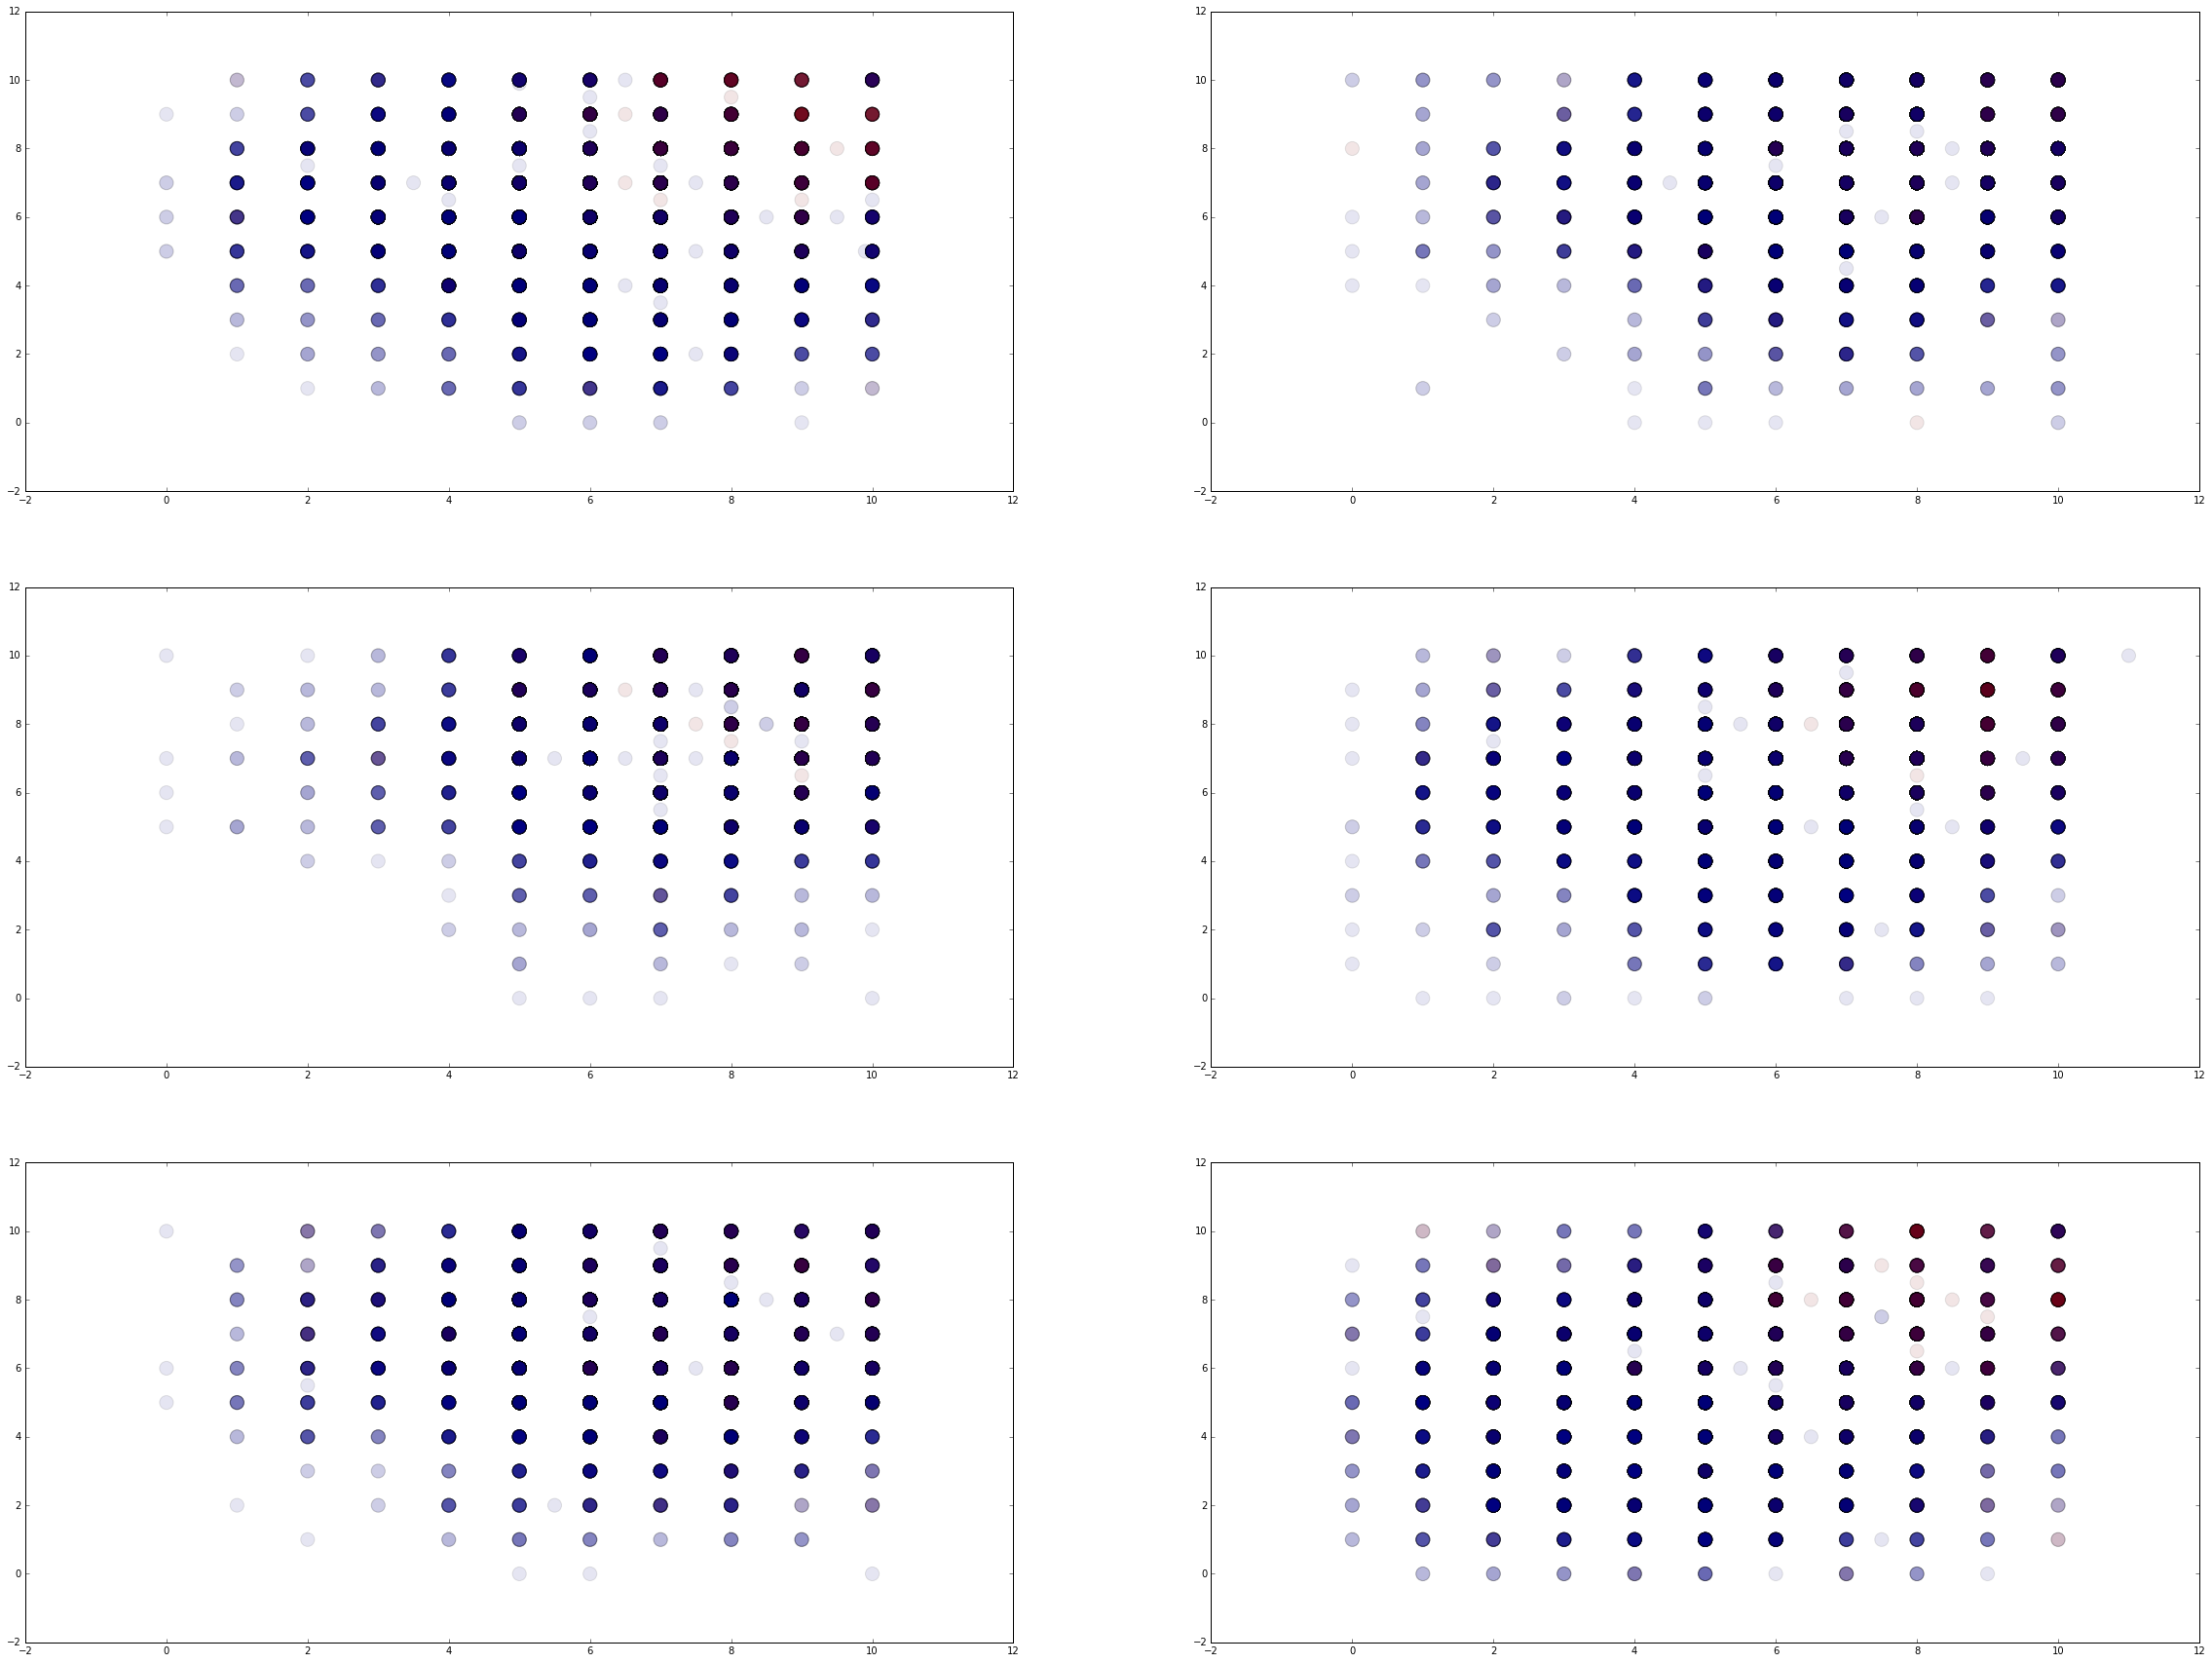

In [50]:
# need to label 
fig, axes = plt.subplots(nrows = 3, ncols = 2)
fig.set_figwidth(40)
fig.set_figheight(30)

plt.sca(axes[0,0])
plt.scatter(speed_dating.attr_o, 
            speed_dating.attr,
            c = speed_dating.match, 
            alpha = 0.1,
            s=200)

plt.sca(axes[0,1])
plt.scatter(speed_dating.sinc_o, 
            speed_dating.sinc,
            c = speed_dating.match, 
            alpha = 0.1,
            s=200)

plt.sca(axes[1,0])
plt.scatter(speed_dating.intel_o, 
            speed_dating.intel,
            c = speed_dating.match, 
            alpha = 0.1,
            s=200)

plt.sca(axes[1,1])
plt.scatter(speed_dating.fun_o, 
            speed_dating.fun,
            c = speed_dating.match, 
            alpha = 0.1,
            s=200)

plt.sca(axes[2,0])
plt.scatter(speed_dating.amb_o, 
            speed_dating.amb,
            c = speed_dating.match, 
            alpha = 0.1,
            s=200)

plt.sca(axes[2,1])
plt.scatter(speed_dating.shar_o, 
            speed_dating.shar,
            c = speed_dating.match, 
            alpha = 0.1,
            s=200)


In [58]:
partner_decision = speed_dating[['dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']]
partner_decision.corr()

,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
dec_o,1.000000,0.483496,0.202844,0.206428,0.408052,0.182552,0.404439
attr_o,0.483496,1.000000,0.394639,0.378691,0.586137,0.360878,0.488035
sinc_o,0.202844,0.394639,1.000000,0.660934,0.505190,0.463563,0.397228
intel_o,0.206428,0.378691,0.660934,1.000000,0.500346,0.630912,0.406016
fun_o,0.408052,0.586137,0.505190,0.500346,1.000000,0.497051,0.619238
amb_o,0.182552,0.360878,0.463563,0.630912,0.497051,1.000000,0.439560
shar_o,0.404439,0.488035,0.397228,0.406016,0.619238,0.439560,1.000000


In [60]:
person_decision = speed_dating[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]
person_decision.corr()

,dec,attr,sinc,intel,fun,amb,shar
dec,1.000000,0.483496,0.202844,0.206428,0.408199,0.182552,0.404439
attr,0.483496,1.000000,0.394639,0.378691,0.586075,0.360878,0.488035
sinc,0.202844,0.394639,1.000000,0.660934,0.505141,0.463563,0.397228
intel,0.206428,0.378691,0.660934,1.000000,0.500292,0.630912,0.406016
fun,0.408199,0.586075,0.505141,0.500292,1.000000,0.496988,0.619171
amb,0.182552,0.360878,0.463563,0.630912,0.496988,1.000000,0.439560
shar,0.404439,0.488035,0.397228,0.406016,0.619171,0.439560,1.000000


In [ ]:
# don't have to get rid of outliers since my data is already standardized on a 1-10 scale 

In [66]:
speed_dating.dropna(how = 'any', subset = ['match', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar'], inplace = True)
speed_dating.drop(speed_dating[speed_dating.fun_o == 11].index, inplace = True)
X = speed_dating[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]
y = speed_dating['match']

X.describe()

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,attr,sinc,intel,fun,amb,shar
count,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000
mean,6.216000,7.183237,7.390871,6.431867,6.782075,5.504647,6.216000,7.183237,7.390871,6.431867,6.782075,5.504647
std,1.946703,1.738924,1.547848,1.954911,1.804472,2.156858,1.946703,1.738924,1.547848,1.954911,1.804472,2.156858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000
50%,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [67]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [68]:
Score1 = knn.score(X, y)

y_hat = knn.predict(X)
Score2 = float(sum(y_hat == y))/len(speed_dating)

print(Score1)
print(Score2)

0.876182572614
0.876182572614


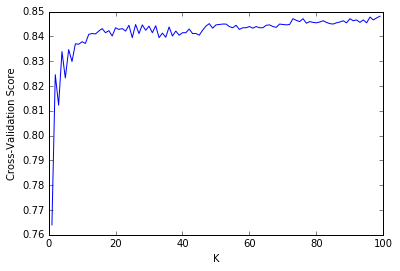

In [69]:
CV_Scores = []
RangeOfK = range(1,100)

for k in RangeOfK:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, weights= 'uniform')
    CV_Scores.append(cross_val_score(knn, X, y, cv=10, scoring = 'accuracy').mean())    

plt.plot(RangeOfK, CV_Scores)
plt.xlabel("K")
plt.ylabel("Cross-Validation Score")
plt.show()